In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from tabulate import tabulate
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from google.colab import drive
#mounting my google driving to access data
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /CP1_and_CP2.csv')

len(df)

913

In [3]:
#making a few new data features with AALANA students


df['AALANA with LA'] = 0
df.loc[(df['AALANA dummy'] == 1) & (df['LA'] == 1), 'AALANA with LA'] = 1

df['AALANA with no LA'] = 0
df.loc[(df['AALANA dummy'] == 1) & (df['LA'] == 0), 'AALANA with no LA'] = 1

df['Non-AALANA with LA'] = 0
df.loc[(df['AALANA dummy'] == 0) & (df['LA'] == 1), 'Non-AALANA with LA'] = 1

df['Non-AALANA with no LA'] = 0
df.loc[(df['AALANA dummy'] == 0) & (df['LA'] == 0), 'Non-AALANA with no LA'] = 1



#double checking the values counts For the different AALANA groups
print(df['AALANA with LA'].value_counts())
print(df['AALANA with no LA'].value_counts())
print(df['Non-AALANA with LA'].value_counts())
print(df['Non-AALANA with no LA'].value_counts())

0    906
1      7
Name: AALANA with LA, dtype: int64
0    774
1    139
Name: AALANA with no LA, dtype: int64
0    882
1     31
Name: Non-AALANA with LA, dtype: int64
1    736
0    177
Name: Non-AALANA with no LA, dtype: int64


In [4]:

df_UP1 = df


Xtrain = df_UP1[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain_DFW = df_UP1['DFW dummy']

log_reg_With_DFW = sm.Logit(ytrain_DFW, Xtrain).fit()
# printing the summary table
print(log_reg_With_DFW.summary())

Optimization terminated successfully.
         Current function value: 0.632820
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                  913
Model:                          Logit   Df Residuals:                      909
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 -0.1235
Time:                        16:09:54   Log-Likelihood:                -577.76
converged:                       True   LL-Null:                       -514.23
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                 -0.8916      0.408     -2.184      0.029      -1.692      -0.091
gender dummy  

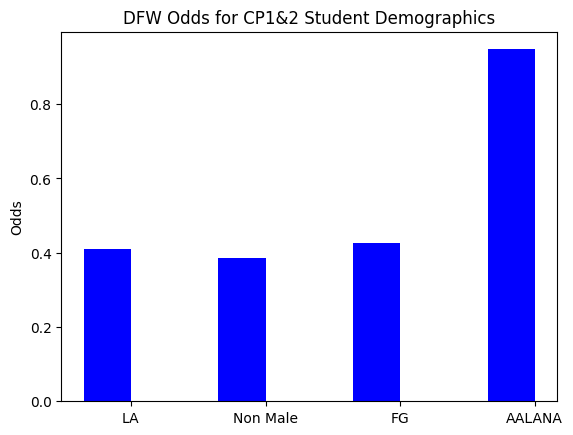

In [5]:

exp_coefficients_DFW = np.exp(log_reg_With_DFW.params)
# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'FG', 'AALANA']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(features)), exp_coefficients_DFW, bar_width, label='AALANA', color='blue')


# Customize the plot
ax.set_title('DFW Odds for CP1&2 Student Demographics')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
#ax.legend()

# Show the plot
plt.show()


In [6]:
Xtrain = df_UP1[['LA', 'gender dummy', 'First Gen dummy', 'AALANA dummy']]
ytrain_SYG = df_UP1['SYG']

log_reg_With_SYG = sm.Logit(ytrain_SYG, Xtrain).fit()
# printing the summary table
print(log_reg_With_SYG.summary())

Optimization terminated successfully.
         Current function value: 0.597891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    SYG   No. Observations:                  913
Model:                          Logit   Df Residuals:                      909
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                -0.07788
Time:                        16:09:54   Log-Likelihood:                -545.87
converged:                       True   LL-Null:                       -506.43
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LA                  0.9285      0.434      2.141      0.032       0.078       1.779
gender dummy  

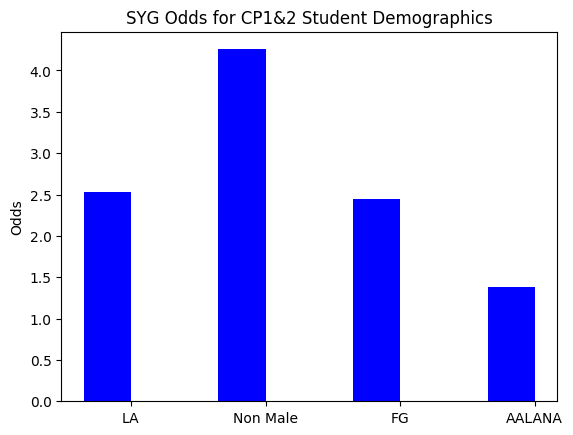

In [7]:

exp_coefficients_SYG = np.exp(log_reg_With_SYG.params)
# Features (replace this with your feature names)
features = ['LA', 'Non Male', 'FG', 'AALANA']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(features)), exp_coefficients_SYG, bar_width, label='AALANA', color='blue')


# Customize the plot
ax.set_title('SYG Odds for CP1&2 Student Demographics')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
#ax.legend()

# Show the plot
plt.show()

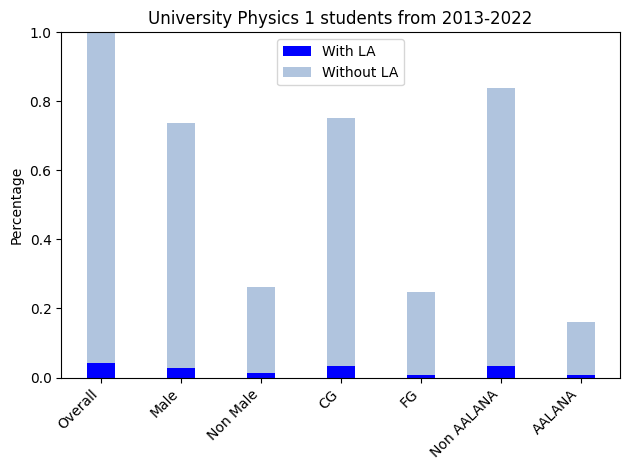

In [8]:
# Calculate overall percentages
overall_with_LA = len(df_UP1[df_UP1['LA'] == 1]) / len(df_UP1)
overall_without_LA = len(df_UP1[df_UP1['LA'] == 0]) / len(df_UP1)

# Define the calculations for specific groups
male_with_LA = len(df_UP1[(df_UP1['gender dummy'] == 0) & (df_UP1['LA'] == 1)]) / len(df_UP1)
male_without_LA = len(df_UP1[(df_UP1['gender dummy'] == 0) & (df_UP1['LA'] == 0)]) / len(df_UP1)

female_with_LA = len(df_UP1[(df_UP1['gender dummy'] == 1) & (df_UP1['LA'] == 1)]) / len(df_UP1)
female_without_LA = len(df_UP1[(df_UP1['gender dummy'] == 1) & (df_UP1['LA'] == 0)]) / len(df_UP1)

CG_with_LA = len(df_UP1[(df_UP1['First Gen dummy'] == 0) & (df_UP1['LA'] == 1)]) / len(df_UP1)
CG_without_LA = len(df_UP1[(df_UP1['First Gen dummy'] == 0) & (df_UP1['LA'] == 0)]) / len(df_UP1)

FG_with_LA = len(df_UP1[(df_UP1['First Gen dummy'] == 1) & (df_UP1['LA'] == 1)]) / len(df_UP1)
FG_without_LA = len(df_UP1[(df_UP1['First Gen dummy'] == 1) & (df_UP1['LA'] == 0)]) / len(df_UP1)

non_AALANA_with_LA = len(df_UP1[(df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 1)]) / len(df_UP1)
non_AALANA_without_LA = len(df_UP1[(df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 0)]) / len(df_UP1)

AALANA_with_LA = len(df_UP1[(df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 1)]) / len(df_UP1)
AALANA_without_LA = len(df_UP1[(df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 0)]) / len(df_UP1)

# Plotting the histogram
labels = ['Overall', 'Overall without LA',
          'Male', 'Male without LA',
          'Non Male', 'Non Male without LA',
          'CG', 'CG without LA',
          'FG', 'FG without LA',
          'Non AALANA', 'Non AALANA without LA',
          'AALANA', 'AALANA without LA']

values = [overall_with_LA, overall_without_LA,
          male_with_LA, male_without_LA,
          female_with_LA, female_without_LA,
          CG_with_LA, CG_without_LA,
          FG_with_LA, FG_without_LA,
          non_AALANA_with_LA, non_AALANA_without_LA,
          AALANA_with_LA, AALANA_without_LA]

# Plotting the grouped bar chart
width = 0.35  # Width of the bars

# Define colors for "with LA" and "without LA" bars
colors_with_LA = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
colors_without_LA = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# Create an array of indices for each group
indices = np.arange(len(labels) // 2)

# Plot "with LA" bars
plt.bar(indices, values[::2], width=width, label='With LA', color=colors_with_LA)

# Plot "without LA" bars stacked on top of "with LA" bars
plt.bar(indices, values[1::2], width=width, bottom=values[::2], label='Without LA', color=colors_without_LA)

#plt.xlabel('University Physics 1 and 2')
plt.ylabel('Percentage')
#plt.title('Students with and without LA by Demographics')

plt.title('University Physics 1 students from 2013-2022')

plt.ylim(0, 1)  # Set y-axis limit to [0, 1]

plt.xticks(indices, labels[::2], rotation=45, ha='right')  # Set x-axis labels and rotate for better readability

plt.legend(loc='upper center')  # Move legend to the upper left

plt.tight_layout()
plt.show()


In [9]:
#What if you just have only AALANA students, and the only feature is LA? And then only non-AALANA students, and the only feature is still LA?




df_With_AALANA = df_UP1[df_UP1['AALANA dummy'] == 1]
df_No_AALANA = df_UP1[df_UP1['AALANA dummy'] == 0]
Xtrain_Only_AALANA = df_With_AALANA[['LA']]
Xtrain_No_AALANA = df_No_AALANA[['LA']]
ytrain_Only_AALANA_DFW = df_With_AALANA['DFW dummy']
ytrain_No_AALANA_DFW = df_No_AALANA['DFW dummy']
ytrain_Only_AALANA_SYG = df_With_AALANA['SYG']
ytrain_No_AALANA_SYG = df_No_AALANA['SYG']


log_reg_Only_AALANA_DFW = sm.Logit(ytrain_Only_AALANA_DFW, Xtrain_Only_AALANA).fit()
log_reg_No_AALANA_DFW = sm.Logit(ytrain_No_AALANA_DFW, Xtrain_No_AALANA).fit()




log_reg_Only_AALANA_SYG = sm.Logit(ytrain_Only_AALANA_SYG , Xtrain_Only_AALANA).fit()
log_reg_No_AALANA_SYG = sm.Logit(ytrain_No_AALANA_SYG, Xtrain_No_AALANA).fit()

# printing the summary table
print(log_reg_Only_AALANA_DFW.summary())
print(log_reg_No_AALANA_DFW.summary())

print(log_reg_Only_AALANA_SYG.summary())
print(log_reg_No_AALANA_SYG.summary())


Optimization terminated successfully.
         Current function value: 0.692656
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682989
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.688598
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682989
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                  146
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                -0.05728
Time:                        16:09:57   Log-Likelihood:                -101.13
converged:                       True   LL-Null:                       -95.649
Covariance Type:            nonrobust  

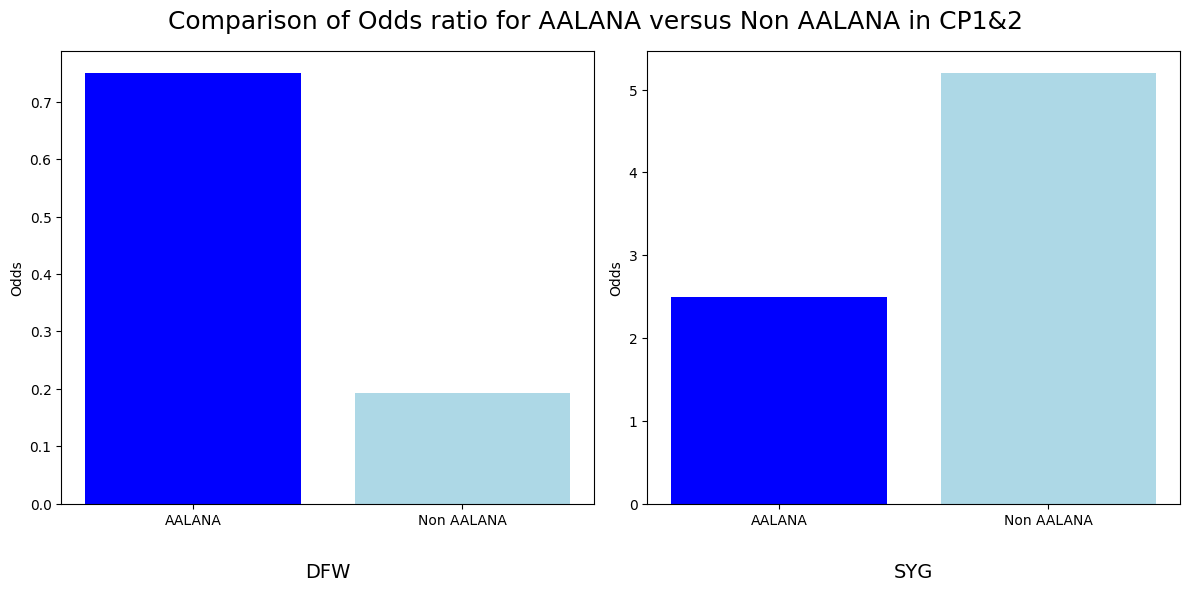

In [10]:
# Extracting the coefficients and their standard errors
coef_dfw_only = log_reg_Only_AALANA_DFW.params['LA']
coef_dfw_no = log_reg_No_AALANA_DFW.params['LA']

coef_syg_only = log_reg_Only_AALANA_SYG.params['LA']
coef_syg_no = log_reg_No_AALANA_SYG.params['LA']

# Calculating the exponentials
exp_coef_dfw_only = np.exp(coef_dfw_only)
exp_coef_dfw_no = np.exp(coef_dfw_no)

exp_coef_syg_only = np.exp(coef_syg_only)
exp_coef_syg_no = np.exp(coef_syg_no)

plt.figure(figsize=(12, 6))

# Histogram for DFW
plt.subplot(1, 2, 1)
plt.bar(['AALANA', 'Non AALANA'], [exp_coef_dfw_only, exp_coef_dfw_no], color=['blue', 'lightblue'])
plt.ylabel('Odds')  # Set the y-label here for the first subplot
plt.text(0.5, -0.15, 'DFW', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)  # Add 'DFW' under the left subplot

# Histogram for SYG
plt.subplot(1, 2, 2)
plt.bar(['AALANA', 'Non AALANA'], [exp_coef_syg_only, exp_coef_syg_no], color=['blue', 'lightblue'])
plt.ylabel('Odds')  # Set the y-label here for the second subplot
plt.text(0.5, -0.15, 'SYG', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14),  # Add 'SYG' under the right subplot

# Overall title
plt.suptitle('Comparison of Odds ratio for AALANA versus Non AALANA in CP1&2', fontsize=18)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [11]:
#What if you just have only AALANA students, and the only feature is LA? And then only non-AALANA students, and the only feature is still LA?

df_FG = df_UP1[df_UP1['First Gen dummy'] == 1]
df_CG = df_UP1[df_UP1['First Gen dummy'] == 0]
Xtrain_FG = df_FG[['LA']]
Xtrain_CG = df_CG[['LA']]
ytrain_FG_DFW = df_FG['DFW dummy']
ytrain_CG_DFW = df_CG['DFW dummy']
ytrain_FG_SYG = df_FG['SYG']
ytrain_CG_SYG = df_CG['SYG']


log_reg_FG_DFW = sm.Logit(ytrain_FG_DFW, Xtrain_FG).fit()
log_reg_CG_DFW = sm.Logit(ytrain_CG_DFW, Xtrain_CG).fit()




log_reg_Only_FG_SYG = sm.Logit(ytrain_FG_SYG, Xtrain_FG).fit()
log_reg_CG_SYG = sm.Logit(ytrain_CG_SYG, Xtrain_CG).fit()

# printing the summary table
print(log_reg_FG_DFW.summary())
print(log_reg_CG_DFW.summary())

print(log_reg_Only_FG_SYG.summary())
print(log_reg_CG_SYG.summary())

Optimization terminated successfully.
         Current function value: 0.688517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684730
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.688517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682554
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                  226
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 -0.2191
Time:                        16:09:58   Log-Likelihood:                -155.60
converged:                       True   LL-Null:                       -127.63
Covariance Type:            nonrobust  

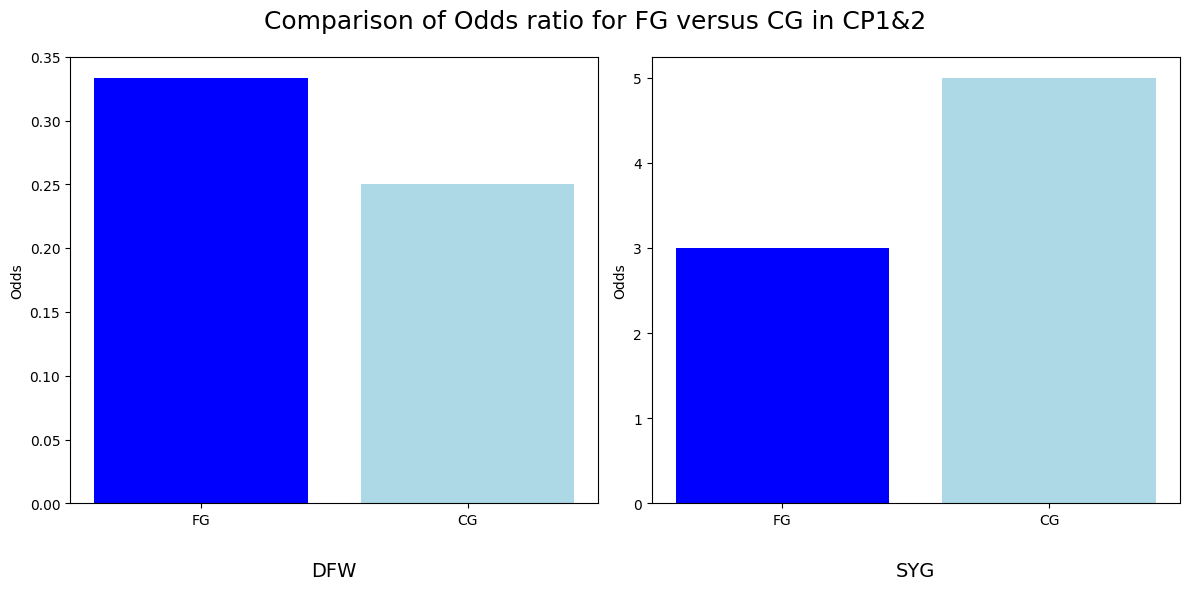

In [12]:
# Extracting the coefficients and their standard errors
coef_dfw_fg = log_reg_FG_DFW.params['LA']
coef_dfw_cg = log_reg_CG_DFW.params['LA']

coef_syg_fg = log_reg_Only_FG_SYG.params['LA']
coef_syg_cg = log_reg_CG_SYG.params['LA']

# Calculating the exponentials
exp_coef_dfw_fg = np.exp(coef_dfw_fg)
exp_coef_dfw_cg = np.exp(coef_dfw_cg)

exp_coef_syg_fg = np.exp(coef_syg_fg)
exp_coef_syg_cg = np.exp(coef_syg_cg)

# Creating histograms
plt.figure(figsize=(12, 6))

# Histogram for DFW
plt.subplot(1, 2, 1)
plt.bar(['FG', 'CG'], [exp_coef_dfw_fg, exp_coef_dfw_cg], color=['blue', 'lightblue'])

plt.ylabel('Odds')  # Set the y-label here for the first subplot
plt.text(0.5, -0.15, 'DFW', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14),  # Add 'SYG' under the right subplot

# Histogram for SYG
plt.subplot(1, 2, 2)
plt.bar(['FG', 'CG'], [exp_coef_syg_fg, exp_coef_syg_cg], color=['blue', 'lightblue'])

plt.ylabel('Odds')  # Set the y-label here for the second subplot
plt.text(0.5, -0.15, 'SYG', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14),  # Add 'SYG' under the right subplot

# Overall title
plt.suptitle('Comparison of Odds ratio for FG versus CG in CP1&2', fontsize=18)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [13]:
#calculate SYGR and DFW rate (for UP1) for AALANA and non-AALANA students who have and have not had LA


# SYG Rate for AALANA who have had  an LA in UP1
(df_UP1['SYG'] == 1)
(df_UP1['AALANA dummy'] == 1)
(df_UP1['AALANA dummy'] == 0)
(df_UP1['LA'] == 1)
(df_UP1['LA'] == 0)


# SYG Rate for AALANA who have had  an LA in UP1
numerator1 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 1) & (df_UP1['SYG'] == 1))
denominator1 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 1))
ratio = sum(numerator1) /sum(denominator1)
print(f'SYG Rate for AALANA who have had an LA in UP1: {ratio}')


#SYG Rate for AALANA who did not have an LA in UP1
numerator3 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 0) & (df_UP1['SYG'] == 1))
denominator3 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 0))
ratio = sum(numerator3) /sum(denominator3)
print(f'SYG Rate for AALANA who did not have an LA in UP1: {ratio}')



# SYG Rate for Non AALANA who have had an LA in UP1
numerator2 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 1) & (df_UP1['SYG'] == 1))
denominator2 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 1))
ratio = sum(numerator2) /sum(denominator2)
print(f'SYG Rate for Non AALANA who have had an LA in UP1: {ratio}')




#SYG Rate for Non AALANA who did not have an LA in UP1
numerator4 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 0) & (df_UP1['SYG'] == 1))
denominator4 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 0))
ratio = sum(numerator4) /sum(denominator4)
print(f'SYG Rate for Non AALANA who did not have an LA in UP1: {ratio}')





SYG Rate for AALANA who have had an LA in UP1: 0.7142857142857143
SYG Rate for AALANA who did not have an LA in UP1: 0.7122302158273381
SYG Rate for Non AALANA who have had an LA in UP1: 0.8387096774193549
SYG Rate for Non AALANA who did not have an LA in UP1: 0.7622282608695652


In [14]:
#calculate SYGR and DFW rate (for UP1) for AALANA and non-AALANA students who have and have not had LA


# SYG Rate for AALANA who have had  an LA in UP1
(df_UP1['SYG'] == 1)
(df_UP1['AALANA dummy'] == 1)
(df_UP1['AALANA dummy'] == 0)
(df_UP1['LA'] == 1)
(df_UP1['LA'] == 0)


# DFW Rate for AALANA who have had  an LA in UP1
numerator1 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 1) & (df_UP1['DFW dummy'] == 1))
denominator1 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 1))
ratio = sum(numerator1) /sum(denominator1)
print(f'DFW Rate for AALANA who have had an LA in UP1: {ratio}')


#DFW Rate for AALANA who did not have an LA in UP1
numerator3 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 0) & (df_UP1['DFW dummy'] == 1))
denominator3 = ((df_UP1['AALANA dummy'] == 1) & (df_UP1['LA'] == 0))
ratio = sum(numerator3) /sum(denominator3)
print(f'DFW Rate for AALANA who did not have an LA in UP1: {ratio}')

# DFW Rate for Non AALANA who have had an LA in UP1
numerator2 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 1) & (df_UP1['DFW dummy'] == 1))
denominator2 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 1))
ratio = sum(numerator2) /sum(denominator2)
print(f'DFW Rate for Non AALANA who have had an LA in UP1: {ratio}')



#DFW Rate for Non AALANA who did not have an LA in UP1
numerator4 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 0) & (df_UP1['DFW dummy'] == 1))
denominator4 = ((df_UP1['AALANA dummy'] == 0) & (df_UP1['LA'] == 0))
ratio = sum(numerator4) /sum(denominator4)
print(f'DFW Rate for Non AALANA who did not have an LA in UP1: {ratio}')



DFW Rate for AALANA who have had an LA in UP1: 0.42857142857142855
DFW Rate for AALANA who did not have an LA in UP1: 0.3597122302158273
DFW Rate for Non AALANA who have had an LA in UP1: 0.16129032258064516
DFW Rate for Non AALANA who did not have an LA in UP1: 0.23233695652173914


In [15]:
#What if you just have only AALANA students, and the only feature is LA? And then only non-AALANA students, and the only feature is still LA?

Xtrain_AALANA = df_UP1[['AALANA with LA', 'AALANA with no LA', 'Non-AALANA with LA']]
ytrain_AALANA_DFW = df_UP1['DFW dummy']
ytrain_AALANA_SYG = df_UP1['SYG']

log_reg_AALANA_DFW = sm.Logit(ytrain_AALANA_DFW, Xtrain_AALANA).fit()
print(log_reg_AALANA_DFW.summary())


log_reg_AALANA_SYG = sm.Logit(ytrain_AALANA_SYG, Xtrain_AALANA).fit()
print(log_reg_AALANA_SYG.summary())






Optimization terminated successfully.
         Current function value: 0.678461
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DFW dummy   No. Observations:                  913
Model:                          Logit   Df Residuals:                      910
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 -0.2046
Time:                        16:09:59   Log-Likelihood:                -619.43
converged:                       True   LL-Null:                       -514.23
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
AALANA with LA        -0.2877      0.764     -0.377      0.706      -1.785       1.209
AALAN

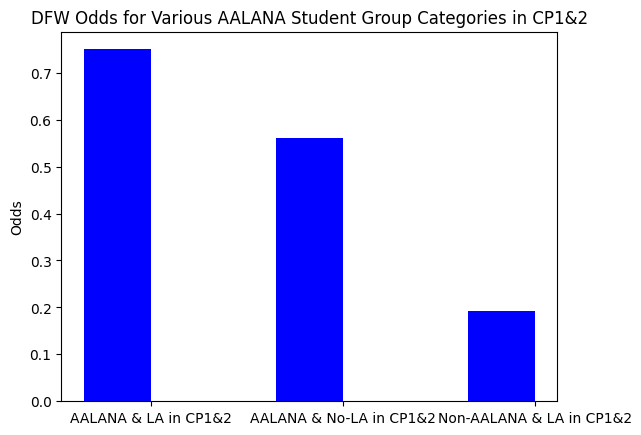

In [16]:

exp_coefficients_AALANA_DFW = np.exp(log_reg_AALANA_DFW.params)
# Features (replace this with your feature names)
features = ['AALANA & LA in CP1&2', 'AALANA & No-LA in CP1&2', 'Non-AALANA & LA in CP1&2']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(features)), exp_coefficients_AALANA_DFW, bar_width, label='AALANA', color='blue')


# Customize the plot
ax.set_title('DFW Odds for Various AALANA Student Group Categories in CP1&2')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
#ax.legend()

# Show the plot
plt.show()


In [17]:
exp_coefficients_AALANA_DFW = np.exp(log_reg_AALANA_DFW.params)

print(exp_coefficients_AALANA_DFW)



print(exp_coefficients_AALANA_DFW[0]/exp_coefficients_AALANA_DFW[2])
#



print(exp_coefficients_AALANA_DFW[1])

AALANA with LA        0.750000
AALANA with no LA     0.561798
Non-AALANA with LA    0.192308
dtype: float64
3.9
0.5617977528089888


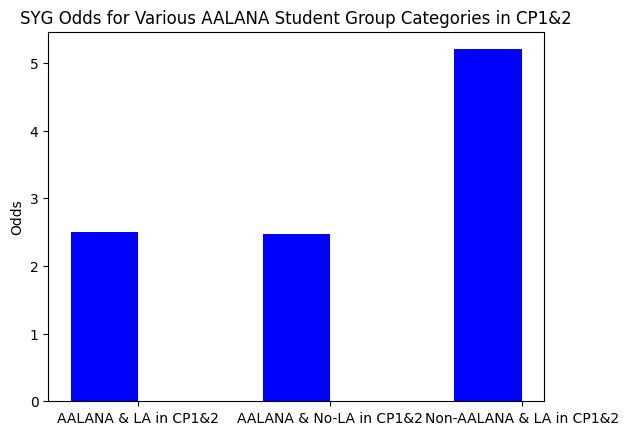

In [18]:

exp_coefficients_AALANA_SYG= np.exp(log_reg_AALANA_SYG.params)
# Features (replace this with your feature names)
features = ['AALANA & LA in CP1&2', 'AALANA & No-LA in CP1&2', 'Non-AALANA & LA in CP1&2']

# Width of the bars
bar_width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(features)), exp_coefficients_AALANA_SYG, bar_width, label='AALANA', color='blue')


# Customize the plot
ax.set_title('SYG Odds for Various AALANA Student Group Categories in CP1&2')
ax.set_xlabel('')
ax.set_ylabel('Odds')
ax.set_xticks(np.arange(len(features)) + bar_width / 2)
ax.set_xticklabels(features)
#ax.legend()

# Show the plot
plt.show()